In [2]:
# Load necessary packages
import glob
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
%matplotlib inline

In [3]:
# Create a dataframe and combine 12 cvs files into one dataframe
path =r'/Users/sys/Desktop/CitibikeDataset' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348257 entries, 0 to 40936
Data columns (total 15 columns):
tripduration               348257 non-null int64
starttime                  348257 non-null object
stoptime                   348257 non-null object
start station id           348257 non-null int64
start station name         348257 non-null object
start station latitude     348257 non-null float64
start station longitude    348257 non-null float64
end station id             348257 non-null int64
end station name           348257 non-null object
end station latitude       348257 non-null float64
end station longitude      348257 non-null float64
bikeid                     348257 non-null int64
usertype                   348257 non-null object
birth year                 346960 non-null float64
gender                     348257 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 42.5+ MB


In [5]:
frame.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,932,2018-01-01 02:06:17.5410,2018-01-01 02:21:50.0270,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31929,Subscriber,1992.0,1
1,550,2018-01-01 12:06:18.0390,2018-01-01 12:15:28.4430,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31845,Subscriber,1969.0,2
2,510,2018-01-01 12:06:56.9780,2018-01-01 12:15:27.8100,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31708,Subscriber,1946.0,1
3,354,2018-01-01 14:53:10.1860,2018-01-01 14:59:05.0960,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,31697,Subscriber,1994.0,1
4,250,2018-01-01 17:34:30.1920,2018-01-01 17:38:40.9840,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,31861,Subscriber,1991.0,1


## Data Cleaning

In [6]:
# Find Missing value
nullvalue= frame.isnull().sum()
nullvalue

tripduration                  0
starttime                     0
stoptime                      0
start station id              0
start station name            0
start station latitude        0
start station longitude       0
end station id                0
end station name              0
end station latitude          0
end station longitude         0
bikeid                        0
usertype                      0
birth year                 1297
gender                        0
dtype: int64

In [7]:
# Drop missing value 
framedrop = frame.dropna()
framedrop.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [8]:
framedrop.describe(include = ['object'])

,starttime,stoptime,start station name,end station name,usertype
count,346960,346960,346960,346960,346960
unique,346512,346538,59,123,2
top,2017-11-28 20:46:02,2017-11-21 08:43:45,Grove St PATH,Grove St PATH,Subscriber
freq,4,3,40359,49782,326119


In [9]:
# Overwrite frame with framedrop
frame = framedrop

### Outliers inspection

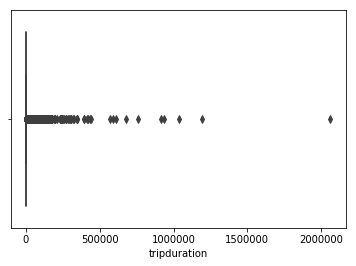

In [10]:
# Exam the trip durations
sns.boxplot(x = frame['tripduration'])

In [11]:
# Calculate the outliers:
# Step 1: calculate the 25th percentile of the total
frame['tripduration'].quantile([.25])

0.25    229.0
Name: tripduration, dtype: float64

In [12]:
# Step 2: calculate the 75th percentile of the total
frame['tripduration'].quantile([.75])

0.75    551.0
Name: tripduration, dtype: float64

In [13]:
# Calculate the upper inner fence: Q3 + 1.5*IQ
upper = 551+1.5*(551-229)
upper

1034.0

In [14]:
upper_minute = upper/60
upper_minute

17.233333333333334

#### The datapoints of over 17.23 min (1034 seconds) are the outliers and should be dropped.

In [15]:
frame2 = frame[(frame['tripduration']) < 1034].reset_index(drop=True)
frame2.shape

(314161, 15)

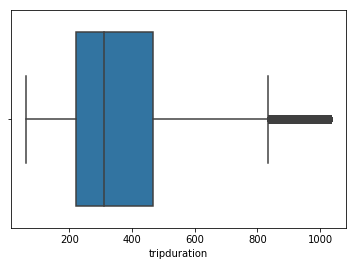

In [16]:
sns.boxplot(x = frame2['tripduration'])

In [17]:
frame.shape

(346960, 15)

In [18]:
# overwrite frame dataset with frame2
frame = frame2

#### 32799 records have been deleted.

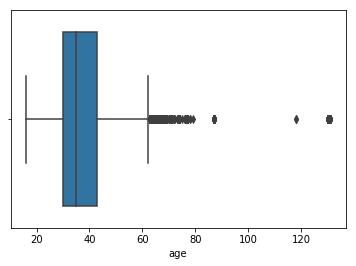

In [19]:
# exam the outliers of the birth year
frame['age'] = 2018-frame['birth year']
sns.boxplot(x = frame['age'])

In [20]:
# calculate the outliers
frame['age'].quantile([.25])

0.25    30.0
Name: age, dtype: float64

In [21]:
frame['age'].quantile([.75])

0.75    43.0
Name: age, dtype: float64

In [22]:
# upper inner fence: Q3 + 1.5*IQ
upper = 43+1.5*(43-30)
upper

62.5

#### Riders with over 62.5 years old are the outliers here and should be dropped.

In [23]:
frame3 = frame[frame['age'] < 62.5]
frame3.shape

(308777, 16)

In [24]:
frame.shape

(314161, 16)

In [25]:
# overwrite frame with frame3
frame = frame3

#### 5384 records have been dropped.

### Variables Correlations

In [26]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df[[col for col in df if df[col].nunique() > 1]] 
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, 
               facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)

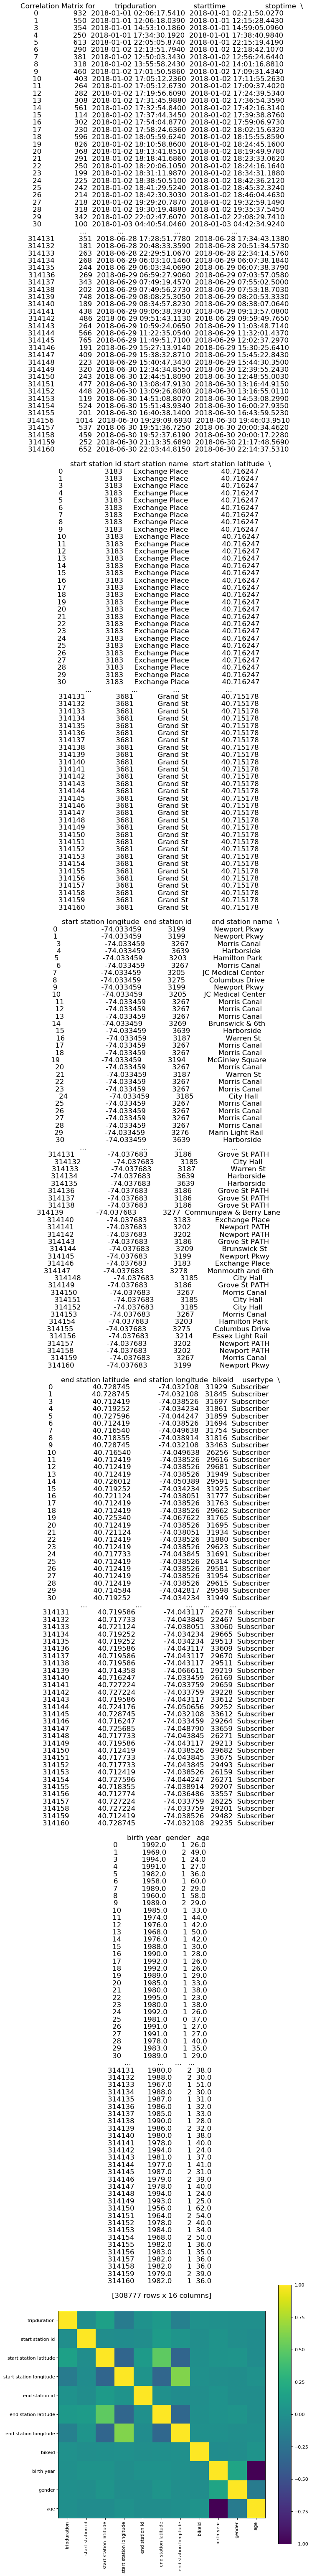

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plotCorrelationMatrix(frame, 10)

#### We found that gender and age have a weak nagetive correlation (around -0.25 correlation coefficient). But we wouldn't include it into the following analysis.

## Exploratory Data Analysis & Visualization

### What’s the gender distribution of Citi Bike users?

In [28]:
# Find the gender = 0 which is unknown.
genderdistr =frame['gender'].value_counts()
genderdistr

1    231055
2     65163
0     12559
Name: gender, dtype: int64

Text(0.5,1,'Citi Bike User Gender Distribution')

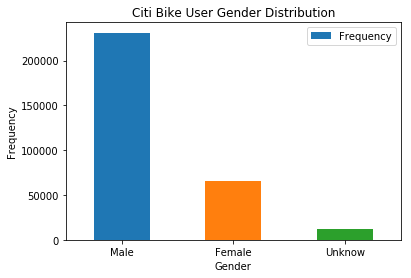

In [30]:
df = pd.DataFrame({'Gender':['Male', 'Female', 'Unknow'], 'Frequency':list(genderdistr)})
ax = df.plot.bar(x='Gender', y='Frequency', rot=0)
plt.ylabel('Frequency')
plt.title('Citi Bike User Gender Distribution')

#### Python Numpy and Pandas aided analysis reveals that male users ride Citi bikes more often

### What's the distribution of the user type?

In [31]:
usertype = frame['usertype'].value_counts()
usertype

Subscriber    298795
Customer        9982
Name: usertype, dtype: int64

Text(0.5,1,'Citi Bike User Type Distribution')

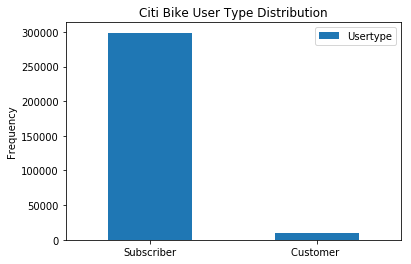

In [32]:
usertype= list(usertype)
usertype
index = ['Subscriber','Customer ']
df = pd.DataFrame({'Usertype': usertype}, index=index)
ax = df.plot.bar(rot=0)
plt.ylabel('Frequency')
plt.title('Citi Bike User Type Distribution')

#### This data visualization result show us that most of the Citi Bike users are Subscribers. 

### What’s the age distribution of Citi Bike riders?

In [33]:
frame['age'].head()

0    26.0
1    49.0
3    24.0
4    27.0
5    36.0
Name: age, dtype: float64

Text(0,0.5,'Frequency')

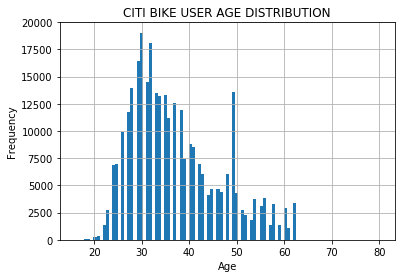

In [34]:
bin_array = np.linspace(start=16., stop=80., num=100)
frame['age'].hist(bins=bin_array)
plt.title('CITI BIKE USER AGE DISTRIBUTION')
plt.xlabel("Age")
plt.ylabel('Frequency')

In [35]:
frame['age'].value_counts().head()

30.0    19036
32.0    18050
29.0    16392
31.0    14534
28.0    13989
Name: age, dtype: int64

#### So, based on the results we got from the histogram and the value_counts method, we are surprised to find that the users at the age of 30 are most enjoying the Citi Bike！

### What are the most popular trips?

In [41]:
trips=[]
trips= frame['start station name'].str.cat([frame['end station name']], sep=' to ')
top5trips= trips.value_counts().head()
top5trips

Hamilton Park to Grove St PATH      8052
Grove St PATH to Hamilton Park      5784
Morris Canal to Exchange Place      4556
Brunswick & 6th to Grove St PATH    4034
Jersey & 6th St to Grove St PATH    3992
Name: start station name, dtype: int64

Text(0.5,1,'The Top 5 Popular Trips')

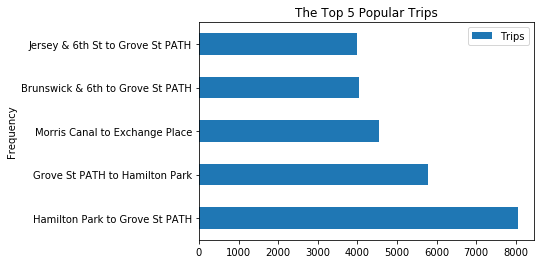

In [42]:
df = pd.DataFrame({'Trips': list(top5trips)}, index=top5trips.index)
ax = df.plot.barh(rot=0)
plt.ylabel('Frequency')
plt.title('The Top 5 Popular Trips')

#### Accordingly, we would say the most popular trip is from Hamilton Park to Grove St PATH.

### What’s the average trip duration in 2017?

In [43]:
# Reframe the dataset to split start time and stop time into Date and Time
frame[['start_date','start_time']] = frame.starttime.astype(str).str.split(' ', expand= True)
frame.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,start_date,start_time,stop_date,stop_time
0,932,2018-01-01 02:06:17.5410,2018-01-01 02:21:50.0270,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31929,Subscriber,1992.0,1,26.0,2018-01-01,02:06:17.5410,2018-01-01,02:21:50.0270
1,550,2018-01-01 12:06:18.0390,2018-01-01 12:15:28.4430,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31845,Subscriber,1969.0,2,49.0,2018-01-01,12:06:18.0390,2018-01-01,12:15:28.4430
3,354,2018-01-01 14:53:10.1860,2018-01-01 14:59:05.0960,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,31697,Subscriber,1994.0,1,24.0,2018-01-01,14:53:10.1860,2018-01-01,14:59:05.0960
4,250,2018-01-01 17:34:30.1920,2018-01-01 17:38:40.9840,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,31861,Subscriber,1991.0,1,27.0,2018-01-01,17:34:30.1920,2018-01-01,17:38:40.9840
5,613,2018-01-01 22:05:05.8740,2018-01-01 22:15:19.4190,3183,Exchange Place,40.716247,-74.033459,3203,Hamilton Park,40.727596,-74.044247,31859,Subscriber,1982.0,1,36.0,2018-01-01,22:05:05.8740,2018-01-01,22:15:19.4190


In [44]:
frame[['stop_date','stop_time']] = frame.stoptime.astype(str).str.split(' ', expand= True)
frame.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,start_date,start_time,stop_date,stop_time
0,932,2018-01-01 02:06:17.5410,2018-01-01 02:21:50.0270,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31929,Subscriber,1992.0,1,26.0,2018-01-01,02:06:17.5410,2018-01-01,02:21:50.0270
1,550,2018-01-01 12:06:18.0390,2018-01-01 12:15:28.4430,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31845,Subscriber,1969.0,2,49.0,2018-01-01,12:06:18.0390,2018-01-01,12:15:28.4430
3,354,2018-01-01 14:53:10.1860,2018-01-01 14:59:05.0960,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,31697,Subscriber,1994.0,1,24.0,2018-01-01,14:53:10.1860,2018-01-01,14:59:05.0960
4,250,2018-01-01 17:34:30.1920,2018-01-01 17:38:40.9840,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,31861,Subscriber,1991.0,1,27.0,2018-01-01,17:34:30.1920,2018-01-01,17:38:40.9840
5,613,2018-01-01 22:05:05.8740,2018-01-01 22:15:19.4190,3183,Exchange Place,40.716247,-74.033459,3203,Hamilton Park,40.727596,-74.044247,31859,Subscriber,1982.0,1,36.0,2018-01-01,22:05:05.8740,2018-01-01,22:15:19.4190


In [45]:
averge_duration = frame.tripduration.mean()/60
print('So the Average Trip Duration in last year is', format(averge_duration, '.2f'))

So the Average Trip Duration in last year is 6.10


### What are the popular stations for longer trips (>6.10min/ 366sec)?

In [46]:
a=frame[frame['tripduration'] > 366]
# To find the most popular start station
b = a['start station name'].value_counts()
b.head()

Sip Ave           9303
Grove St PATH     8533
Newport PATH      7123
Hamilton Park     6519
Exchange Place    6413
Name: start station name, dtype: int64

In [47]:
# To find the most popular end station
b = a['end station name'].value_counts()
b.head()

Grove St PATH     9770
Exchange Place    7711
Newport PATH      7154
Hamilton Park     6983
Sip Ave           6760
Name: end station name, dtype: int64

#### To conclude, the most popular start station is Sip Ave, and end station is Grove St Path for trips longer than 6.1min.

### What’s the trip distribution by month?

In [48]:
# Split the start_date by "-" to find the month of each trip
month = frame['start_date'].astype(str).str.split('-', expand= True)
#Find the most popular month with the highest number of trips.
a = month[1].value_counts()
a

08    39374
07    36364
10    35762
06    35641
09    34057
05    30163
11    20915
04    20797
03    15741
12    14307
02    13938
01    11718
Name: 1, dtype: int64

Text(0.5,1,'Trip distribution by Month')

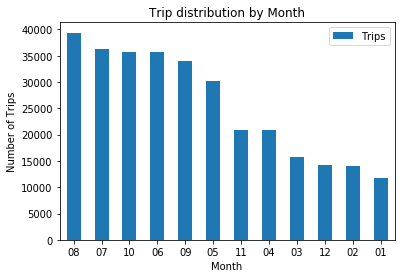

In [49]:
df = pd.DataFrame({'Trips': list(a)}, index=a.index)
ax = df.plot.bar(rot=0)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trip distribution by Month')

#### Accourdingly, the Most popular month is the Augest, with the highest number of trips (39374 trips)

### What’s the peak hour for Citi Bike trips?

In [51]:
# Split the start_date by ":" to find the time in the day of each trip
time = frame['start_time'].astype(str).str.split(':', expand= True)
#Find the most popular time with the highest number of trips.
b = time[0].value_counts()
b

08    38747
18    33198
17    28574
19    23285
07    22728
09    19078
20    16273
16    15519
13    12366
12    12229
15    12153
14    11590
10    11569
11    11015
21    10666
06     9716
22     6994
23     4138
05     3398
00     2485
01     1265
04      695
02      632
03      464
Name: 0, dtype: int64

Text(0.5,1,'Trip distribution by Time Period within a day')

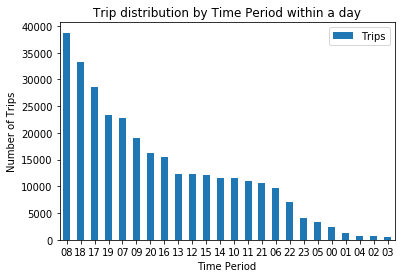

In [141]:
df1 = pd.DataFrame({'Trips': list(b)}, index=b.index)
ax = df1.plot.bar(rot=0)
plt.xlabel('Time Period')
plt.ylabel('Number of Trips')
plt.title('Trip distribution by Time Period within a day')

#### So, The most popular time in the day to ride a bike is 8 a.m., the second popular time in the day is 6 p.m.

### End of the code submission. Thank you.